# Main Comparison Plots

# Switching Time Chart

In [1]:
import glob
import json
import pandas as pd
file_list = glob.glob("switching*")

columns=['name', 'num_configs', "ram(MB)", "disk_load(ms)", "warmup(ms)"]
num_configs_dict = {
    "assine2022b": 16,
    "assine2022a": 12,
    "matsubara2022": 4,
    "lee2021": 5,
}

rows = []

for file in file_list:
    with open(file, "r") as fp:
        data = json.load(fp)
        name = file.split('switching_result_')[1].split(".json")[0]
        num_configs = num_configs_dict[name]
        ram = data["ram"]*1000
        disk_load = sum([l["disk_load"] for l in data["lists"]])
        warmup = sum([l["warmup"] for l in data["lists"]])
        row = [name, num_configs, ram, disk_load, warmup]
        rows.append(row)
        
    

df = pd.DataFrame(rows, columns=columns)
df = df.set_index("name")
df = df.round(1)
print(df)
# print(df.to_latex())

               num_configs  ram(MB)  disk_load(ms)  warmup(ms)
name                                                          
matsubara2022            4    239.9          709.9     12785.1
assine2022a             12    204.9         1207.0      9913.6
lee2021                  5    153.4         1264.5      5045.5
assine2022b             16     85.7          954.0      1811.5


## Dynamic Behaviour


In [2]:
!pip install jsonlines
!ls

1m_output.jsonl  switching_result_assine2022a.json
docker_run.sh	 switching_result_assine2022b.json
output.jsonl	 switching_result_lee2021.json
plots.ipynb	 switching_result_matsubara2022.json
rpi4_cpus4.csv


In [3]:
import jsonlines
ignore_start = 5
def get_values(key):
    with jsonlines.open('output.jsonl') as reader:
        values = [obj[key] for obj in reader]
    values = values[ignore_start:]
    return values
    

bw = get_values("bw")
e2e = get_values("e2e")
mAP = get_values("map")
deadline = get_values("deadline")
time = get_values("time")
time = [t - time[0] for t in time]
mode = get_values("mode")
compute = [m//10 for m in mode]
bits = [m%10 for m in mode]


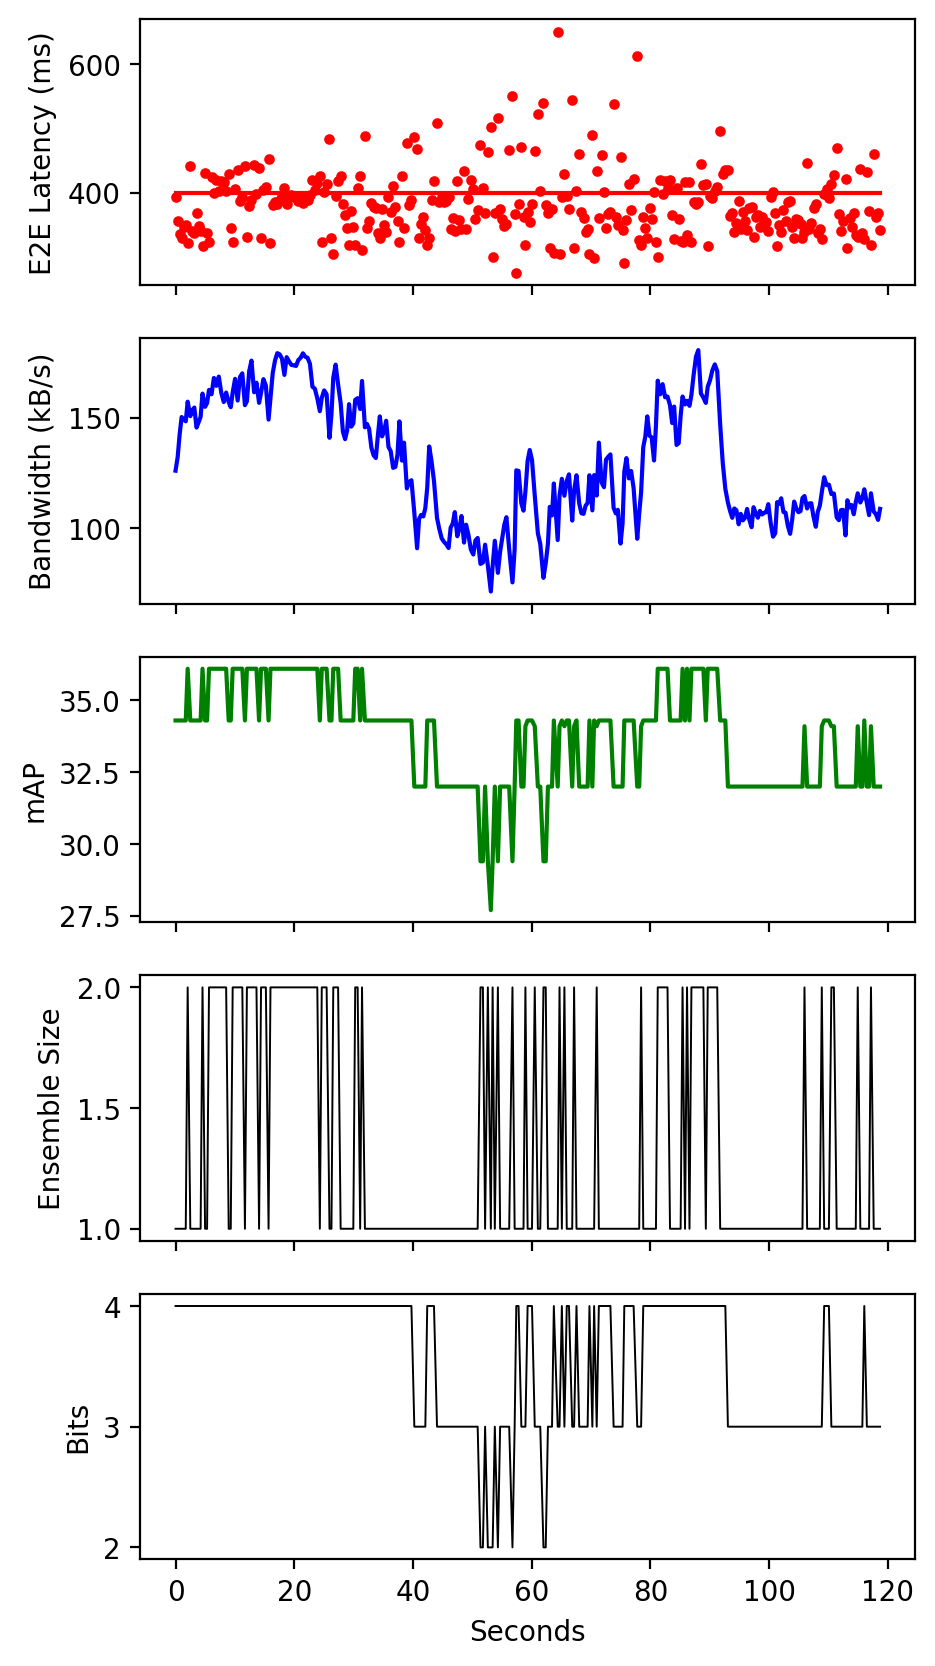

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig, ax = plt.subplots(5, 1, figsize=(5, 10), dpi=200)


for a in fig.get_axes():
    a.label_outer()
    
p0 = ax[0].scatter(time, e2e, s=8, color='r', label="E2E Latency")
# p0 = ax[0].plot(time, e2e, "r-", linewidth=0.7)
p0 = ax[0].plot(time, deadline, "r-")
p1 = ax[1].plot(time, bw, "b-", label="Bandwidth(kB/s)")
p2 = ax[2].plot(time, mAP, "g-", label="mAP")
p3 = ax[3].plot(time, compute, linewidth=0.7, color="black", label="mAP")
p4 = ax[4].plot(time, bits, linewidth=0.7, color="black", label="mAP")



ax[0].set_ylabel("E2E Latency (ms)")
ax[1].set_ylabel("Bandwidth (kB/s)")
ax[2].set_ylabel("mAP")
ax[3].set_ylabel("Ensemble Size")
ax[4].set_ylabel("Bits")
ax[4].set_xlabel("Seconds")

plt.savefig("dynamic.pdf")

In [ ]:
import numpy as np
import jsonlines
ignore_start = 5
def get_mean(key):
    with jsonlines.open('1m_output.jsonl') as reader:
        values = [obj[key] for obj in reader]
    values = values[ignore_start:]
    return np.mean(values)
    

bw = get_mean("bw")
model_time = get_mean("model_time")*1000
e2e = get_mean("e2e")
mAP = get_mean("map")
deadline = get_mean("deadline")


width =0.3
data = [e2e-model_time, model_time]
print(data)
plt.bar(np.arange(len(data)), data, width=width)
plt.show()


# data1 = [23,85, 72, 43, 52]
# data2 = [42, 35, 21, 16, 9]

# plt.bar(np.arange(len(data1)), data1, width=width)
# plt.bar(np.arange(len(data2))+ width, data2, width=width)
# plt.show()